In [1]:
from helpers import *

In [3]:
# plot a pretty picture in the current directory called "output.png"
simulator = mendelSim(precision = 1000, num_points=100000)
simulator.run_sim()

1.5188106

In [35]:
# parallelize to speed up
def monteCarlo(precision, num_points, simStrat):
    # no plot simulator
    simulator = mendelSim(precision=precision, num_points=num_points, simStrat = simStrat, draw=False, niceColors=False)
    return simulator.run_sim()

In [36]:
# try to get a good estimate of the influence of num_points (s) and precision(i)
# alter amount of jobs to fit your system
# results for precision
# shuffle the input to enhance time estimate
inputPrecisionSize = 1000
inputPrecision = np.arange(inputPrecisionSize)
np.random.shuffle(inputPrecision)
resultsPrecision = Parallel(n_jobs=8)(delayed(monteCarlo)(simStrat = "random",precision = i, num_points = 10000)
                                      for i in notebook.tqdm(inputPrecision))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [37]:
# results for number of points
inputPointSize = 30000
inputPoints = np.arange(inputPointSize)
np.random.shuffle(inputPoints)
resultsPoints = Parallel(n_jobs=8)(delayed(monteCarlo)(simStrat = "random",precision = 100, num_points = i+1)
                                   for i in notebook.tqdm(inputPoints))

  0%|          | 0/30000 [00:00<?, ?it/s]

In [38]:
# investigate the convergence of the two parameters
# convert to np array to enhance speed

arrPrecision = np.array(resultsPrecision)
errorPrecision = abs(arrPrecision - arrPrecision[np.where(inputPrecision == inputPrecisionSize-1)][0])
precisionResult = np.array((inputPrecision, arrPrecision, errorPrecision))


arrPoints = np.array(resultsPoints)
errorPoints = abs(arrPoints - arrPoints[np.where(inputPoints == inputPointSize-1)[0]])
pointResult = np.array((inputPoints, arrPoints, errorPoints))


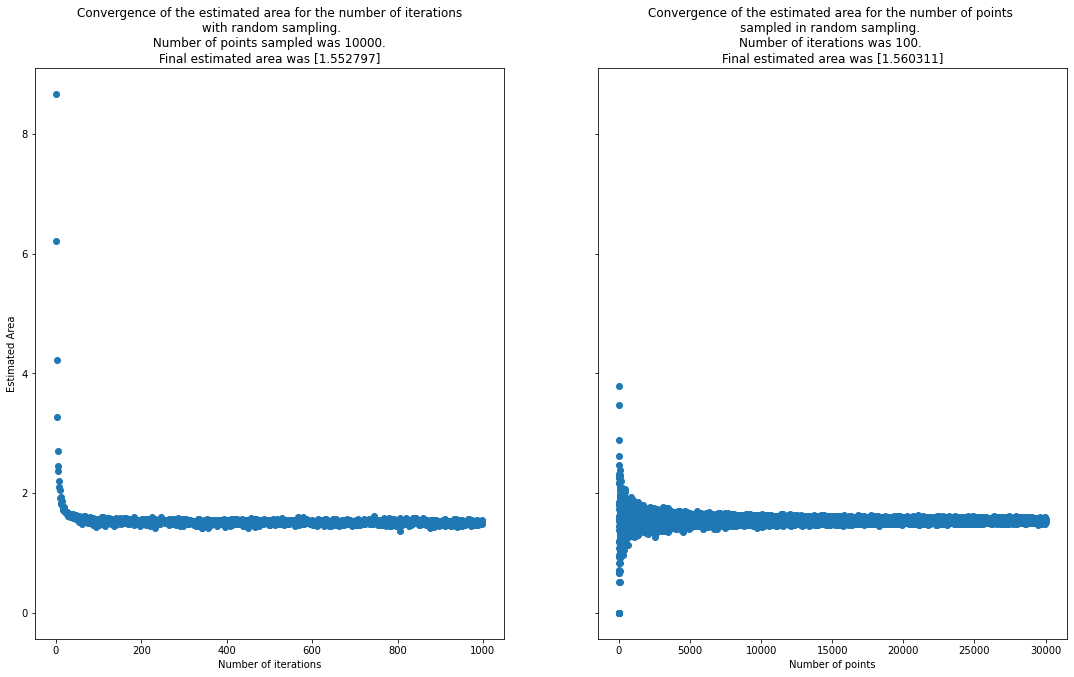

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(18.5, 10.5)
ax1.scatter(precisionResult[0], precisionResult[1])
ax1.set_ylabel("Estimated Area")
ax1.set_xlabel("Number of iterations")
ax1.set_title(f"Convergence of the estimated area for the number of iterations\n with random sampling.\n Number of points sampled was 10000. \nFinal estimated area was {arrPrecision[np.where(inputPrecision == inputPrecisionSize-1)[0]]}")

ax2.scatter(pointResult[0], pointResult[1])
ax2.set_xlabel("Number of points")
ax2.set_title(f"Convergence of the estimated area for the number of points \nsampled in random sampling. \nNumber of iterations was 100. \nFinal estimated area was {arrPoints[np.where(inputPoints == inputPointSize-1)[0]]}")
#ax2.savefig("pointsArea.jpg")
fig.savefig("figures/randomArea.jpg")

([0.6505623846980411,
  0.03492234242550747,
  0.03268008000307068,
  0.03167414524521183,
  0.034892407998508436],
 [1.672369305,
  1.5185331599999998,
  1.51914873,
  1.5138210149999998,
  1.5093386249999998])

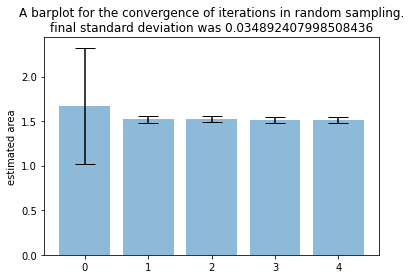

In [58]:
createBars(5, precisionResult, "A barplot for the convergence of iterations in random sampling.", "figures/barPrecision.jpg")

([0.126168102066394,
  0.03559262625276957,
  0.027618380779416234,
  0.0228744615482614,
  0.02040469199170036],
 [1.546629144706234,
  1.5464460514999616,
  1.5466428183570435,
  1.5461882929943616,
  1.5457133253722781])

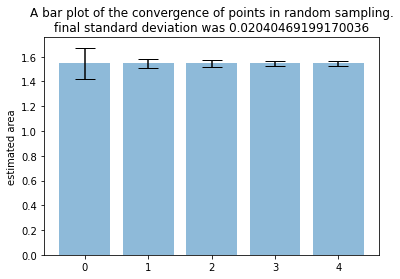

In [59]:
createBars(5, pointResult, "A bar plot of the convergence of points in random sampling.", "figures/barPoint.jpg")

In [13]:
simulator = mendelSim(simStrat = "latin", width = 1000, aspectRatio = 1, precision = 1000)
simulator.run_sim()

1.59528

In [60]:
def monteCarloLatin(precision, width):
    simulator = mendelSim(simStrat = "latin", width = width, aspectRatio = 1, precision = precision, draw=False, niceColors=False)
    return simulator.run_sim()


In [61]:
#test convergence of latin hypercube strategy. This works a little differently, because our input points are dependent on the 
# width of the picture

inputPrecisionSize = 1000
inputPrecision = np.arange(inputPrecisionSize)
np.random.shuffle(inputPrecision)
resultsPrecision = Parallel(n_jobs=8)(delayed(monteCarloLatin)(precision = i, width = 10000)
                                      for i in notebook.tqdm(inputPrecision))

arrPrecision = np.array(resultsPrecision)
errorPrecision = abs(arrPrecision - arrPrecision[np.where(inputPrecision == inputPrecisionSize-1)][0])
precisionResult = np.array((inputPrecision, arrPrecision, errorPrecision))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [63]:
inputPointSize = 10000
inputPoint = np.arange(inputPointSize)
np.random.shuffle(inputPoint)
resultsPoint = Parallel(n_jobs=8)(delayed(monteCarloLatin)(precision = 100, width = i+1)
                                      for i in notebook.tqdm(inputPoint))

arrPoint = np.array(resultsPoint)
errorPoint = abs(arrPoint - arrPoint[np.where(inputPoint == inputPointSize-1)][0])
pointResult = np.array((inputPoint, arrPoint, errorPoint))

  0%|          | 0/10000 [00:00<?, ?it/s]

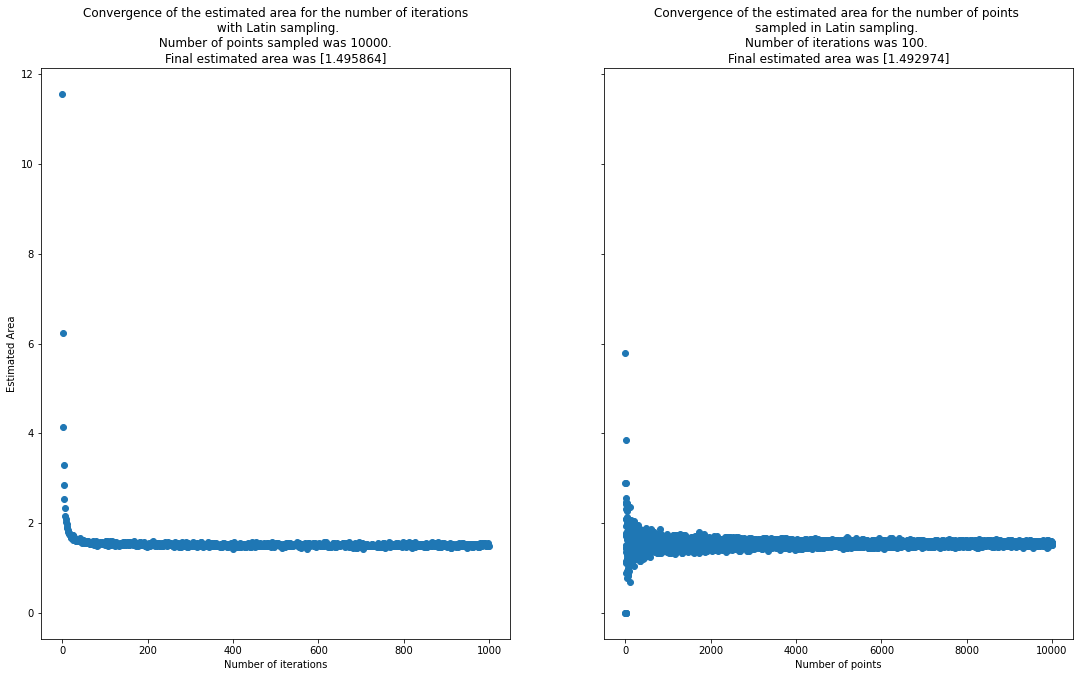

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(18.5, 10.5)
ax1.scatter(precisionResult[0], precisionResult[1])
ax1.set_ylabel("Estimated Area")
ax1.set_xlabel("Number of iterations")
ax1.set_title(f"Convergence of the estimated area for the number of iterations\n with Latin sampling.\n Number of points sampled was 10000. \nFinal estimated area was {arrPrecision[np.where(inputPrecision == inputPrecisionSize-1)[0]]}")

ax2.scatter(pointResult[0], pointResult[1])
ax2.set_xlabel("Number of points")
ax2.set_title(f"Convergence of the estimated area for the number of points \nsampled in Latin sampling. \nNumber of iterations was 100. \nFinal estimated area was {arrPoints[np.where(inputPoints == inputPointSize-1)[0]]}")

fig.savefig("figures/latinArea.jpg")

([0.8162090515915157,
  0.028333085993587064,
  0.02854361341901896,
  0.029347704541070996,
  0.028362075410068285],
 [1.69107772, 1.520718, 1.5141981599999996, 1.5113254999999999, 1.51088044])

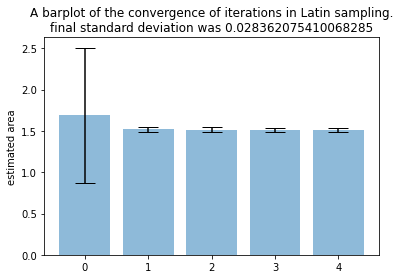

In [64]:
createBars(5, precisionResult, "A barplot of the convergence of iterations in Latin sampling.", "figures/barPrecisionLatin.jpg")

([0.20040639529619178,
  0.051652938259147,
  0.03975344129444223,
  0.03331735124042894,
  0.02932930656058976],
 [1.5488616286641725,
  1.545941621904662,
  1.5454563090602635,
  1.5465234007600106,
  1.5459713651068163])

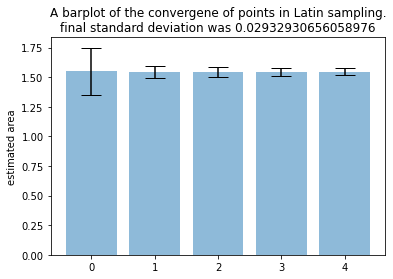

In [65]:
createBars(5, pointResult,  "A barplot of the convergene of points in Latin sampling.", "figures/barPointLatin.jpg")

In [5]:
simulator = mendelSim(simStrat = "orthogonalFast", width = 80**2, aspectRatio = 1, precision = 100)
simulator.run_sim()

1.5316999999999998

In [67]:
def monteCarloOrtho(precision, width):
    simulator = mendelSim(simStrat = "orthogonalFast", width = width, aspectRatio = 1, precision = precision, draw=False, niceColors=False)
    return simulator.run_sim()

In [68]:
#test convergence of orthogonal latin hypercube strategy. This works a little differently, 
# because our input points are dependent on the square of the width of the picture

inputPrecisionSize = 1000
inputPrecision = np.arange(inputPrecisionSize)
np.random.shuffle(inputPrecision)
resultsPrecision = Parallel(n_jobs=8)(delayed(monteCarloOrtho)(precision = i, width = 10000)
                                      for i in notebook.tqdm(inputPrecision))

arrPrecision = np.array(resultsPrecision)
errorPrecision = abs(arrPrecision - arrPrecision[np.where(inputPrecision == inputPrecisionSize-1)][0])
precisionResult = np.array((inputPrecision, arrPrecision, errorPrecision))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [69]:
inputPointSize = 173
inputPoint = (np.arange(inputPointSize)+1)**2
np.random.shuffle(inputPoint)
resultsPoint = Parallel(n_jobs=6)(delayed(monteCarloOrtho)(precision = 100, width = i)
                                      for i in notebook.tqdm(inputPoint))

arrPoint = np.array(resultsPoint)
pointResult = np.array((inputPoint, arrPoint))

  0%|          | 0/173 [00:00<?, ?it/s]

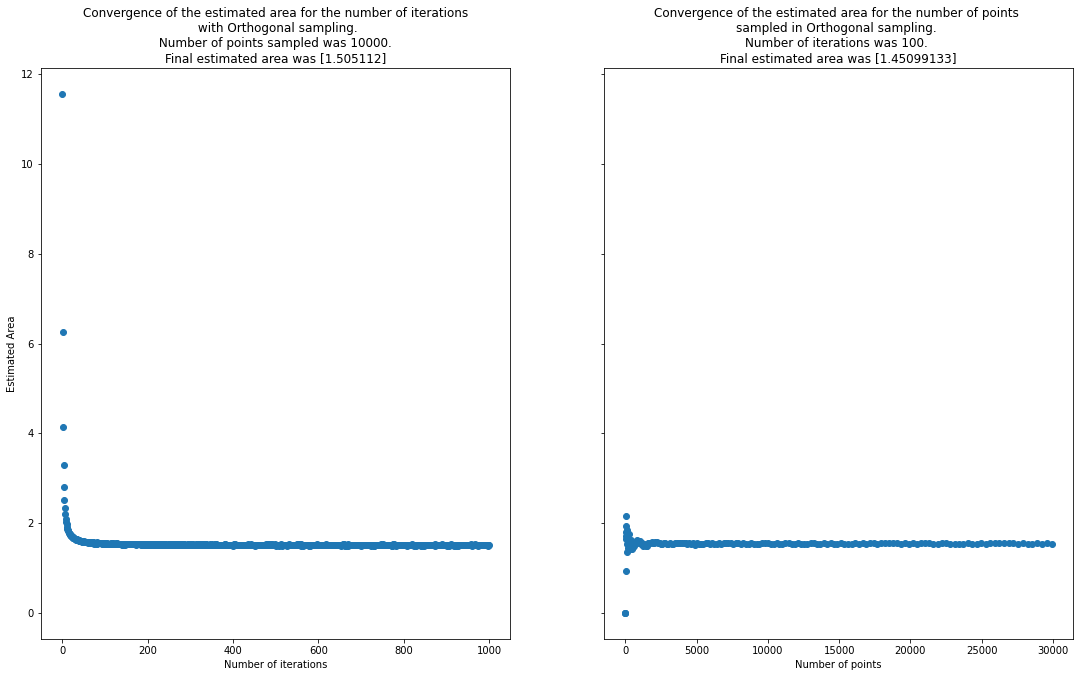

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(18.5, 10.5)
ax1.scatter(precisionResult[0], precisionResult[1])
ax1.set_ylabel("Estimated Area")
ax1.set_xlabel("Number of iterations")
ax1.set_title(f"Convergence of the estimated area for the number of iterations\n with Orthogonal sampling.\n Number of points sampled was 10000. \nFinal estimated area was {arrPrecision[np.where(inputPrecision == inputPrecisionSize-1)[0]]}")

ax2.scatter(pointResult[0], pointResult[1])
ax2.set_xlabel("Number of points")
ax2.set_title(f"Convergence of the estimated area for the number of points \nsampled in Orthogonal sampling. \nNumber of iterations was 100. \nFinal estimated area was {arrPoints[np.where(inputPoint == (inputPointSize-1)**2)[0]]}")

fig.savefig("figures/orthoArea.jpg")

([0.8165431457818315,
  0.00693067794984013,
  0.006816948270626673,
  0.006690611530525452,
  0.0063410340819459446],
 [1.6901644799999997,
  1.5192903399999997,
  1.5132213399999999,
  1.51185726,
  1.5103544599999998])

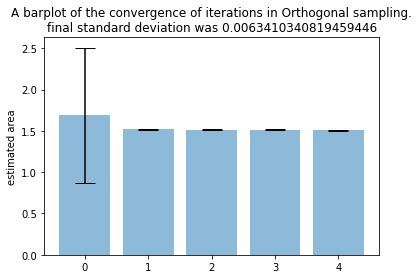

In [73]:
createBars(5, precisionResult, "A barplot of the convergence of iterations in Orthogonal sampling.", "figures/barPrecisionOrtho.jpg")

([0.4865095850169583,
  0.020127737171628888,
  0.009670250069757568,
  0.006778336216022069,
  0.004766389184198222],
 [1.4388268471164678,
  1.5448099382092368,
  1.5473021295115972,
  1.5462625691719556,
  1.5451001976944339])

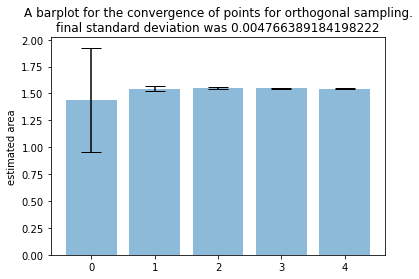

In [75]:
createBars(5, pointResult, "A barplot for the convergence of points for orthogonal sampling.", "figures/barPointOrtho.jpg")

In [2]:
simulator = mendelSim(simStrat = "antiThetic",num_points = 10000, x = -0.5, aspectRatio = 3, precision = 100)
simulator.run_sim()

1.5590586666666666

In [76]:
def monteCarloAnti(precision, num_points):
    # no plot simulator
    simulator = mendelSim(x = -0.5, aspectRatio = 3, precision=precision, num_points=num_points, 
                          simStrat = "antiThetic", draw=False, niceColors=False)
    return simulator.run_sim()

In [79]:
inputPrecisionSize = 1000
inputPrecision = np.arange(inputPrecisionSize)
np.random.shuffle(inputPrecision)
resultsPrecision = Parallel(n_jobs=8)(delayed(monteCarloAnti)(precision = i, num_points = 10000)
                                      for i in notebook.tqdm(inputPrecision))

arrPrecision = np.array(resultsPrecision)
errorPrecision = abs(arrPrecision - arrPrecision[np.where(inputPrecision == inputPrecisionSize-1)][0])
precisionResult = np.array((inputPrecision, arrPrecision, errorPrecision))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
inputPointSize = 10000
inputPoint = np.arange(inputPointSize)
np.random.shuffle(inputPoint)
resultsPoint = Parallel(n_jobs=8)(delayed(monteCarloAnti)(precision = 100, num_points = i+2)
                                      for i in notebook.tqdm(inputPoint))

arrPoint = np.array(resultsPoint)
errorPoint = abs(arrPoint - arrPoint[np.where(inputPoint == inputPointSize-1)][0])
pointResult = np.array((inputPoint, arrPoint, errorPoint))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(18.5, 10.5)
ax1.scatter(precisionResult[0], precisionResult[1])
ax1.set_ylabel("Estimated Area")
ax1.set_xlabel("Number of iterations")
ax1.set_title(f"Convergence of the estimated area for the number of iterations\n with Antithetic sampling.\n Number of points sampled was 10000. \nFinal estimated area was {arrPrecision[np.where(inputPrecision == inputPrecisionSize-1)[0]]}")

ax2.scatter(pointResult[0], pointResult[1])
ax2.set_xlabel("Number of points")
ax2.set_title(f"Convergence of the estimated area for the number of points \nsampled in Antithetic sampling. \nNumber of iterations was 100. \nFinal estimated area was {arrPoints[np.where(inputPoint == inputPointSize-1)[0]]}")

fig.savefig("figures/antiArea.jpg")

In [ ]:
createBars(5, precisionResult, "A barplot of the convergence of iterations in Latin sampling.", "figures/barPrecisionAnti.jpg")

In [ ]:
createBars(5, pointResult,  "A barplot of the convergence of points in latin sampling.", "figures/barPointAnti.jpg")